In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Decision Trees in Machine Learning (ML) for RNA torsion

URL: EG : https://towardsai.net/p/machine-learning/decision-trees-in-machine-learning-ml-with-python-tutorial-3bfb457bce67


*   Implementation on the Iris dataset
*   Pictorial representation of decision tree



**RNA TOR Dataset**

In [ ]:
#!wget https://raw.githubusercontent.com/towardsai/tutorials/master/decision_tree_learning/Iris.csv

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import tree

%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/combine2.dat"
#path = "/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/sample_all.dat"
#df=pd.read_csv(path)
df= pd.read_csv(path, delim_whitespace=True, error_bad_lines=False)

#df = df.squeeze()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#force to print all 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(df)

In [ ]:
#df['dimtype'] = pd.factorize(df['dimtype'])[0] + 1

**Import all packages**

**Read Dataset**

In [ ]:
#df = pd.read_csv('Iris.csv')
#df

In [ ]:
df.shape

(5677874, 12)

**Define Colunms**

In [ ]:
col_names = list(df.columns)

In [ ]:
col_names 


['epsi',
 'zeta',
 'alfa',
 'beta',
 'gamma',
 '1ch0',
 '2ch0',
 '1d1',
 '1d2',
 '2d1',
 '2d2',
 'dimtype']

In [ ]:
X_names = list(df.columns[:-1])

In [ ]:
X_names

['epsi',
 'zeta',
 'alfa',
 'beta',
 'gamma',
 '1ch0',
 '2ch0',
 '1d1',
 '1d2',
 '2d1',
 '2d2']

**Drop Id Column**

In [ ]:
#df = df.drop(['id'], axis=1)

In [ ]:
df.head()

,epsi,zeta,alfa,beta,gamma,1ch0,2ch0,1d1,1d2,2d1,2d2,dimtype
0,244.2642,321.0865,253.9696,224.6157,53.7475,76.7660,196.7646,344.3954,31.6629,333.2986,36.4056,bulges_AC
1,236.4689,329.4293,236.4609,244.6502,67.7690,264.0079,186.0702,336.5215,35.4332,336.4320,35.6999,bulges_AC
2,265.9230,178.4847,240.9484,219.1352,171.0146,225.1323,190.0040,37.3591,324.7876,334.7417,35.6108,bulges_AC
3,221.3683,264.1443,298.9557,235.6010,87.0424,9.9145,201.3151,40.9697,322.1651,326.0096,44.7505,bulges_AC
4,214.6381,287.7440,304.0660,172.8353,43.0846,196.6740,205.1035,335.0256,36.4128,334.0420,36.9832,bulges_AC


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677874 entries, 0 to 5677873
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   epsi     float64
 1   zeta     float64
 2   alfa     float64
 3   beta     float64
 4   gamma    float64
 5   1ch0     float64
 6   2ch0     float64
 7   1d1      float64
 8   1d2      float64
 9   2d1      float64
 10  2d2      float64
 11  dimtype  object 
dtypes: float64(11), object(1)
memory usage: 519.8+ MB


**Checking the  target categorical counts**

In [ ]:
df['dimtype'].value_counts() 

stems_GG       373787
stems_CC       282049
stems_GC       278122
stems_CG       179332
stems_GU       170409
                ...  
bulges_CU        7521
sstrands_UC      7366
sstrands_CU      6386
sstrands_GC      5707
sstrands_CG      5228
Name: dimtype, Length: 95, dtype: int64

In [ ]:
y_names=list(df['dimtype'].unique())

In [ ]:
y_names

['bulges_AC',
 'bulges_AG',
 'bulges_AU',
 'bulges_CA',
 'bulges_CC',
 'bulges_CG',
 'bulges_CU',
 'bulges_GA',
 'bulges_GC',
 'bulges_GG',
 'bulges_GU',
 'bulges_UA',
 'bulges_UC',
 'bulges_UG',
 'bulges_UU',
 'hairpins_AA',
 'hairpins_AC',
 'hairpins_AG',
 'hairpins_AU',
 'hairpins_CA',
 'hairpins_CC',
 'hairpins_CG',
 'hairpins_CU',
 'hairpins_GA',
 'hairpins_GC',
 'hairpins_GG',
 'hairpins_GU',
 'hairpins_UA',
 'hairpins_UC',
 'hairpins_UG',
 'hairpins_UU',
 'iloops_AA',
 'iloops_AC',
 'iloops_AG',
 'iloops_AU',
 'iloops_CA',
 'iloops_CC',
 'iloops_CG',
 'iloops_CU',
 'iloops_GA',
 'iloops_GC',
 'iloops_GG',
 'iloops_GU',
 'iloops_UA',
 'iloops_UC',
 'iloops_UG',
 'iloops_UU',
 'junctions_AA',
 'junctions_AC',
 'junctions_AG',
 'junctions_AU',
 'junctions_CA',
 'junctions_CC',
 'junctions_CG',
 'junctions_CU',
 'junctions_GA',
 'junctions_GC',
 'junctions_GG',
 'junctions_GU',
 'junctions_UA',
 'junctions_UC',
 'junctions_UG',
 'junctions_UU',
 'sstrands_AA',
 'sstrands_AC',
 'sstr

**Check missing values in variables**

In [ ]:
df.isnull().sum()

epsi       0
zeta       0
alfa       0
beta       0
gamma      0
1ch0       0
2ch0       0
1d1        0
1d2        0
2d1        0
2d2        0
dimtype    0
dtype: int64

In [ ]:
target_col = df['dimtype']

In [ ]:
X = df.drop(['dimtype'], axis=1)

y = df['dimtype']

In [ ]:
X

,epsi,zeta,alfa,beta,gamma,1ch0,2ch0,1d1,1d2,2d1,2d2
0,244.2642,321.0865,253.9696,224.6157,53.7475,76.7660,196.7646,344.3954,31.6629,333.2986,36.4056
1,236.4689,329.4293,236.4609,244.6502,67.7690,264.0079,186.0702,336.5215,35.4332,336.4320,35.6999
2,265.9230,178.4847,240.9484,219.1352,171.0146,225.1323,190.0040,37.3591,324.7876,334.7417,35.6108
3,221.3683,264.1443,298.9557,235.6010,87.0424,9.9145,201.3151,40.9697,322.1651,326.0096,44.7505
4,214.6381,287.7440,304.0660,172.8353,43.0846,196.6740,205.1035,335.0256,36.4128,334.0420,36.9832
...,...,...,...,...,...,...,...,...,...,...,...
5677869,219.9156,274.2486,312.5328,158.5970,51.8588,193.6075,194.5295,334.4416,39.2273,335.2239,37.6736
5677870,220.6150,280.7881,297.2703,162.3802,57.0618,202.1366,205.8580,336.4682,35.5141,338.6012,35.6082
5677871,208.2063,292.7978,279.3852,168.2712,69.0346,207.3987,203.0963,335.2136,35.2552,333.2648,37.5680
5677872,204.8224,291.9448,294.7456,181.8706,55.6305,189.2089,189.2934,328.5024,41.9282,328.1097,39.9243


**Split dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.

**Check datatypes**

In [ ]:
X_train.dtypes

epsi     float64
zeta     float64
alfa     float64
beta     float64
gamma    float64
1ch0     float64
2ch0     float64
1d1      float64
1d2      float64
2d1      float64
2d2      float64
dtype: object

In [ ]:
X_col_names = list(X_train.columns)
X_col_names

['epsi',
 'zeta',
 'alfa',
 'beta',
 'gamma',
 '1ch0',
 '2ch0',
 '1d1',
 '1d2',
 '2d1',
 '2d2']

**Decision Tree Classification based on Gini index criterion**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
#clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini
y_pred_gini.shape

(1873699,)

In [ ]:
y_pred_gini

array(['stems_GC', 'stems_UG', 'stems_GU', ..., 'hairpins_GU',
       'iloops_GU', 'iloops_UU'], dtype=object)

**Check accurcy of model**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))# y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 0.2989


In [ ]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['hairpins_UG', 'hairpins_GG', 'hairpins_GU', ..., 'iloops_UG',
       'iloops_AU', 'stems_GA'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [ ]:
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.2989


In [ ]:
y_train

1099128    hairpins_UG
867208     hairpins_GG
945330     hairpins_GU
587108     hairpins_CA
25357        bulges_AG
              ...     
2249467      iloops_UG
5157699       stems_GU
2215104      iloops_UG
1484405      iloops_AU
4500015       stems_GA
Name: dimtype, Length: 3804175, dtype: object

In [ ]:
print(y_names[0])

bulges_AC


[[3468   65   84 ...   36   26   28]
 [  71 3123   57 ...   52   50   31]
 [  79   52 1308 ...   38   30   14]
 ...
 [  32   56   39 ... 6961 1520 1049]
 [  30   64   36 ... 1612 9439  648]
 [  21   28   24 ... 1003  679 3586]]


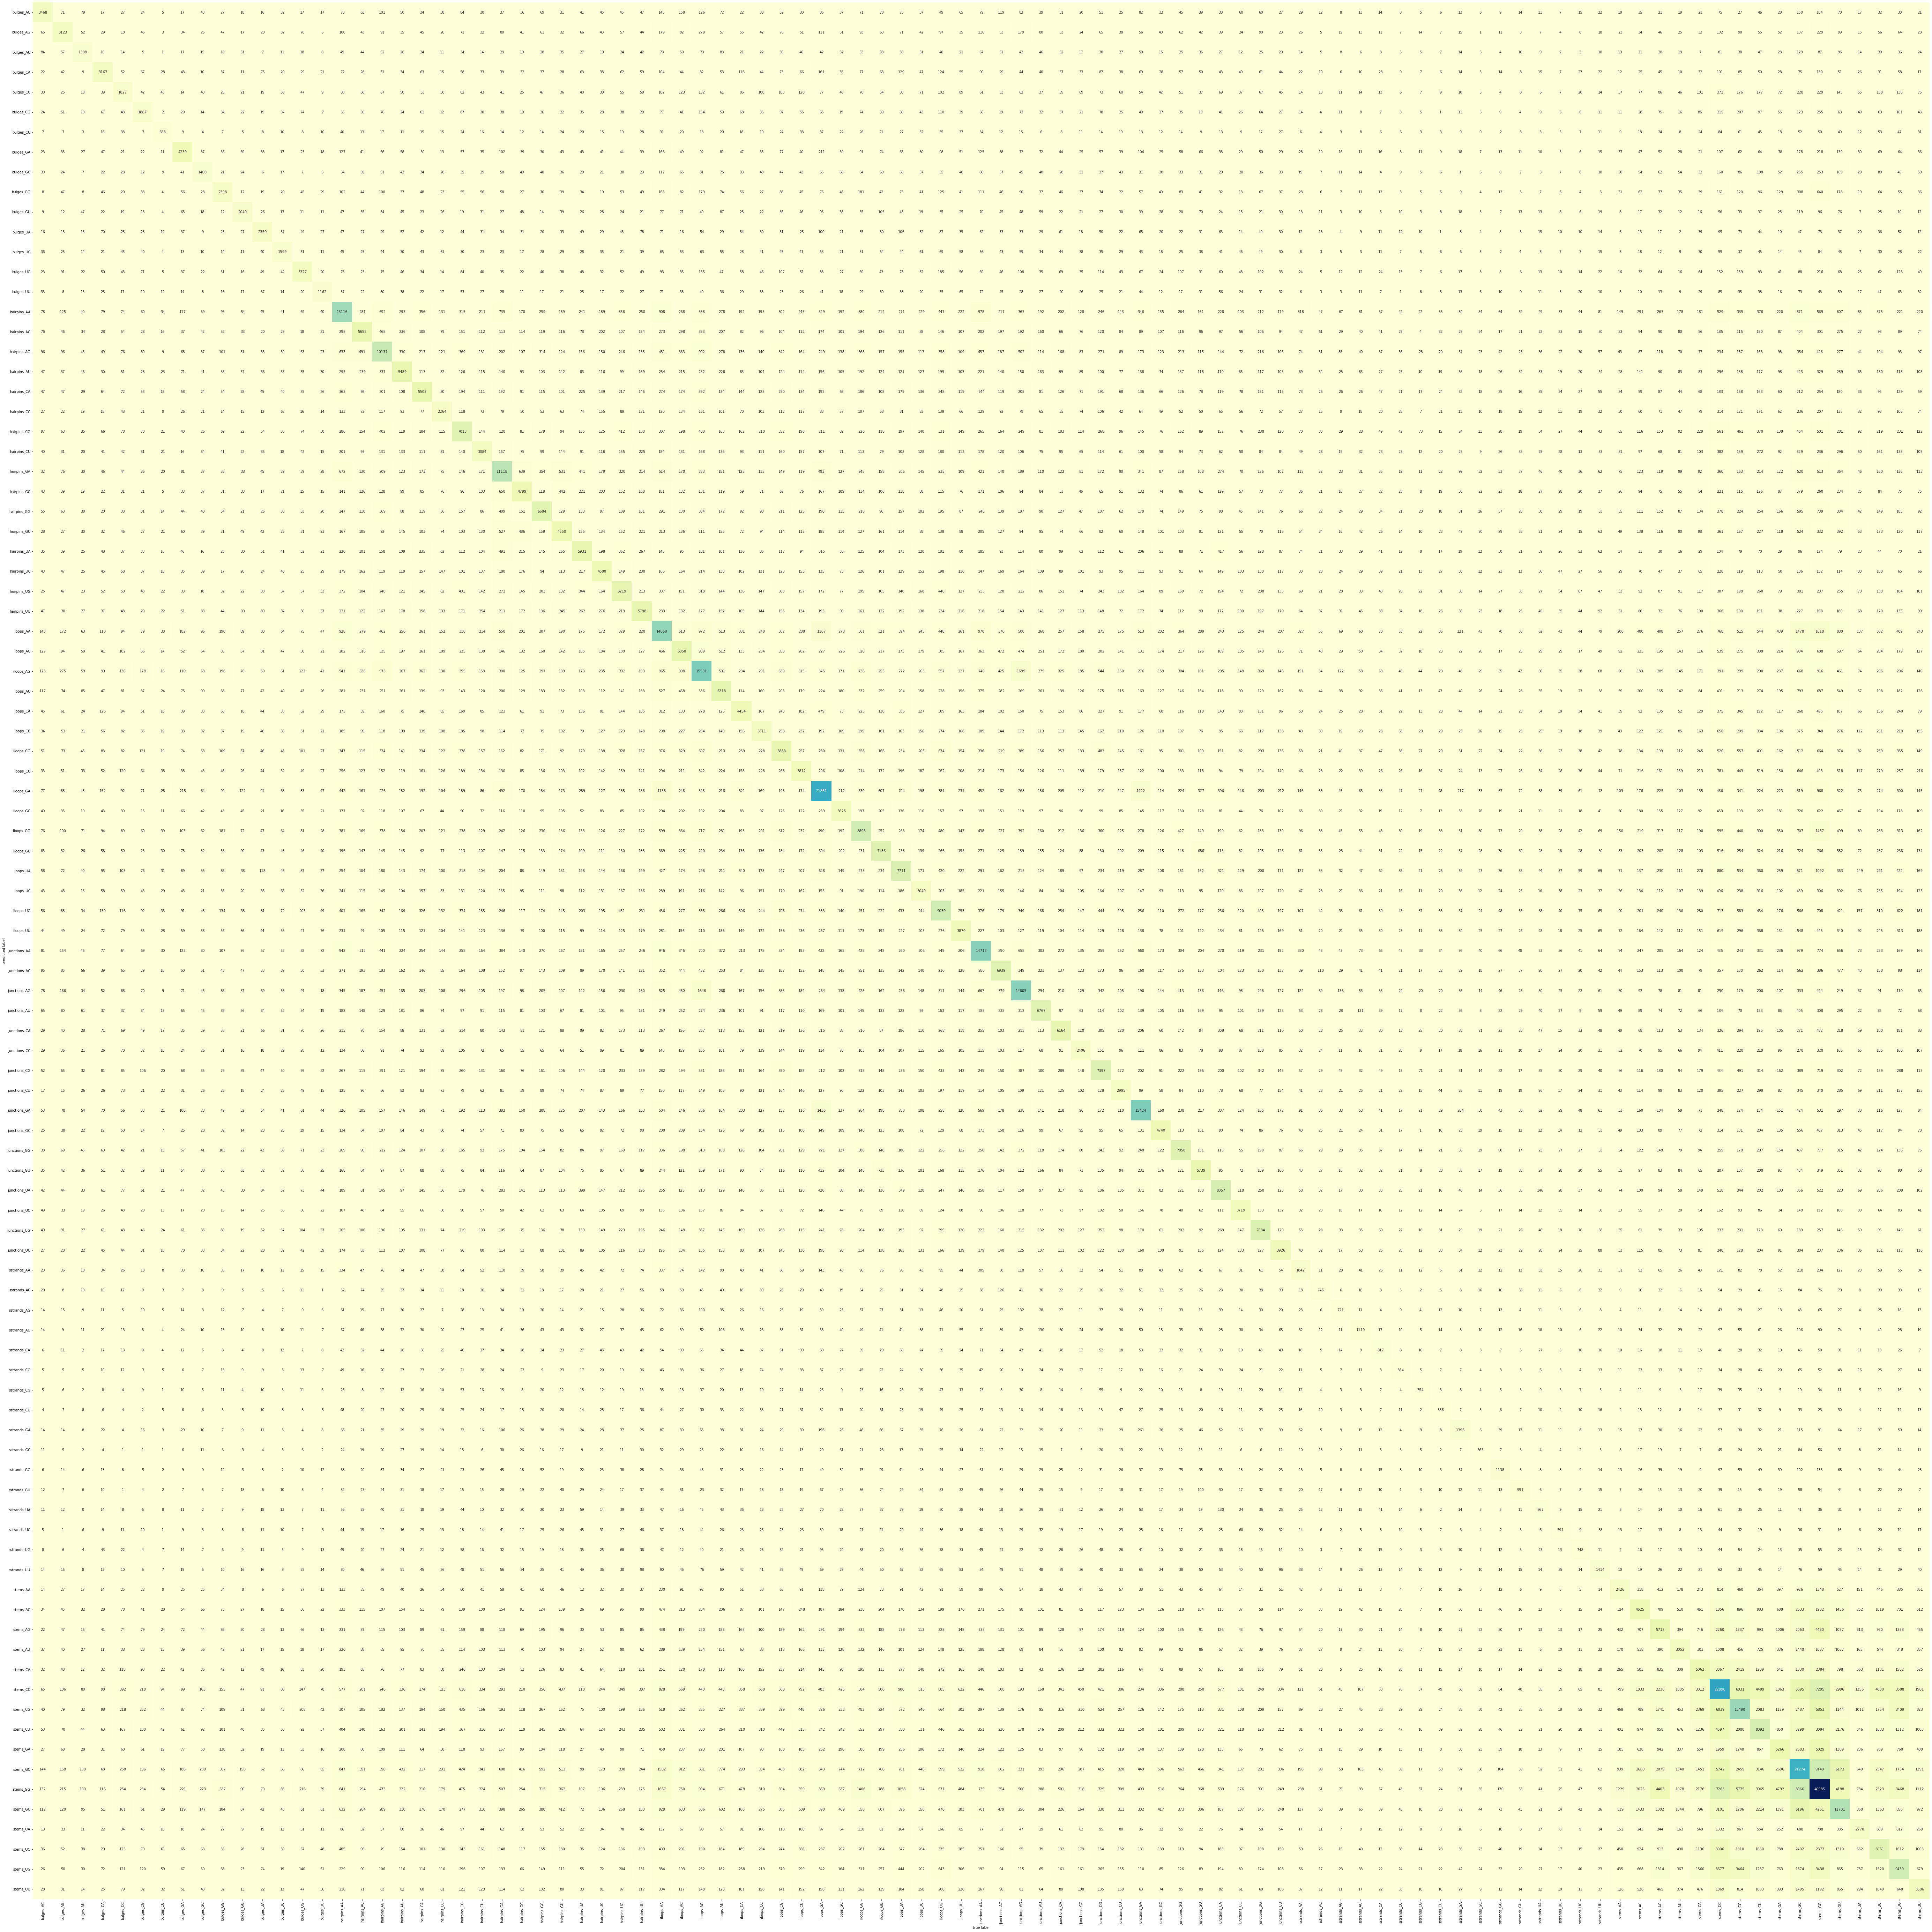

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

matrix = confusion_matrix(y_test, y_pred_gini )

#matrix = confusion_matrix(y_test , y_pred_gini)

#sns.heatmap(matrix.T, fmt='d', cmap="YlGnBu", cbar=False, square=True, annot=True)
ax = plt.subplots(figsize=(100,100)) 
ax=sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu" )


plt.xlabel('true label')
plt.ylabel('predicted label')
ax.set_xticklabels(y_names, rotation= 90)
ax.set_yticklabels(y_names, rotation= 0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/fusion_matrix.png', bbox_inches='tight', dpi=300  )
print(matrix)

In [ ]:
#Accuracy
metrics.accuracy_score(y_test, y_pred_gini ) #sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix) #https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

0.298939690953563

In [ ]:
#precision
# True positive (number in diagonal)/All positives (column sum)
#get the precision score 
precision = metrics.precision_score(y_test, y_pred_gini, 
                                   average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=y_names)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results
#out: 



,precision
bulges_AC,0.458669
bulges_AG,0.386510
bulges_AU,0.315789
bulges_CA,0.428147
bulges_CC,0.237211
...,...
stems_GU,0.202745
stems_UA,0.189143
stems_UC,0.179518
stems_UG,0.222371


**What parameter is most important ?**

In [ ]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(clf_gini.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

   feature  importance
1     zeta       0.100
0     epsi       0.097
3     beta       0.097
5     1ch0       0.096
6     2ch0       0.096
4    gamma       0.094
2     alfa       0.092
7      1d1       0.083
9      2d1       0.082
8      1d2       0.081
10     2d2       0.081


In [ ]:
#   feature  importance
#1     zeta       0.100
#0     epsi       0.097
#3     beta       0.097
##5     1ch0       0.096
#6     2ch0       0.096
#4    gamma       0.094
#2     alfa       0.092
#7      1d1       0.083
#9      2d1       0.082
#8      1d2       0.081
#10     2d2       0.081

**Pictorial representation of Decision Tree**

In [ ]:
#plt.figure(figsize=(12,8), dpi=300)
#tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) 

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_names,  
                                class_names=y_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png", ) 
graph
#graph.write_png('/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/my_decision_tree.png')
graph.render('/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/decision_tree',format='png', view=True)

In [ ]:
#!pip install dtreeviz

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/combine2.dat"

#df=pd.read_csv(path)
df= pd.read_csv(path, delim_whitespace=True, error_bad_lines=False)

#df = df.squeeze()

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.dimtype)
df['target'] = label_encoder.transform(df.dimtype)


In [ ]:
class_names = list(label_encoder.classes_) 
class_names 

In [ ]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(df.iloc[:,:11], df.target)

In [ ]:
df.columns[0:11]

In [ ]:
list(label_encoder.classes_)

In [ ]:
pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(classifier,
         df.iloc[:,:11],
         df.target,
         target_name='dimer_type',
         feature_names=df.columns[0:11],
         class_names=list(label_encoder.classes_ , )
         )


In [ ]:
viz.save('/content/drive/MyDrive/Colab Notebooks/res_data/combine_data_1ds/viz.svg')